# SVM и его ядра
__Суммарное количество баллов: 10__

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Задание 1 (7 баллов)

Примените метод SVM (например, из библиотеки sklearn) для датасета blobs2.

Визуализируйте результат (разбиение плоскости и опорные вектора) при разных вариантах ядер (линейное; полиномиальное степеней 2,3,5; RBF).

In [3]:
from sklearn.svm import SVC

def read_blobs(path_to_csv):
    df = pd.read_csv(path_to_csv, header=0)
    y = df["label"]
    return df.drop("label", axis=1).to_numpy(), np.array(y.values)



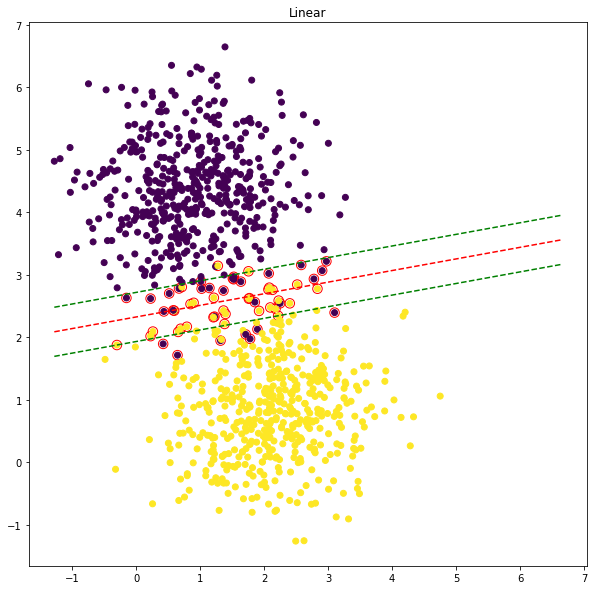

In [9]:
X, y = read_blobs("hw7_data/blobs2.csv")

svm = SVC(kernel='linear')
svm.fit(X, y)
plt.figure(figsize=(10, 10))

w = svm.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X.min(), X.max())
yy = a * xx - (svm.intercept_[0]) / w[1]

plt.plot(xx, yy, 'r--')
margin = 1 / np.sqrt(np.sum(svm.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin
plt.plot(xx, yy_down, 'g--')
plt.plot(xx, yy_up, 'g--')

plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=90, facecolors='none', edgecolors='r')
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Linear')
plt.show()

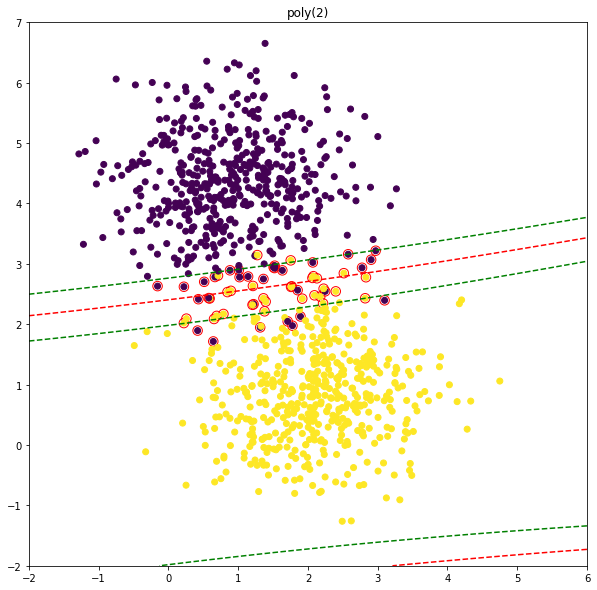

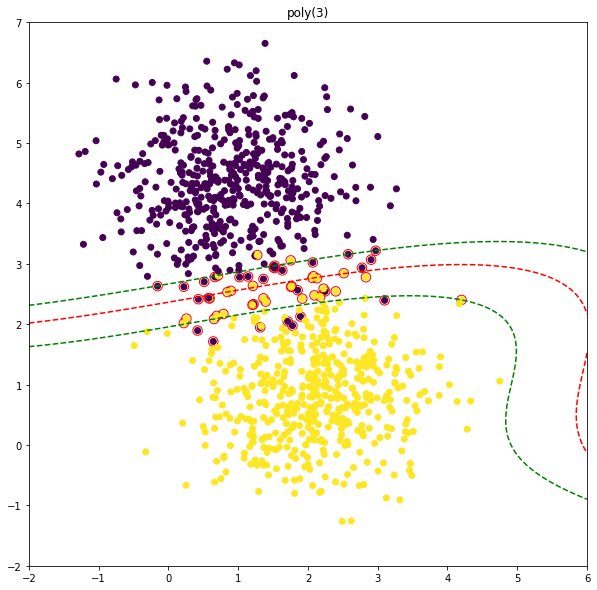

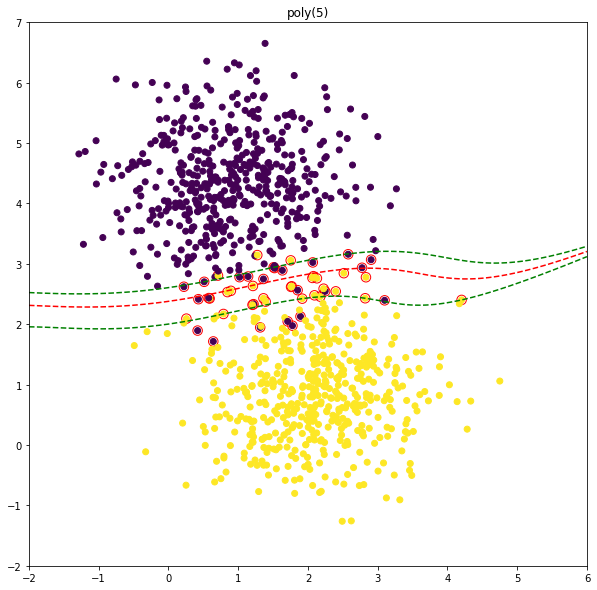

In [12]:
for i in [2, 3, 5]:
    svm = SVC(kernel='poly', degree=i)
    svm.fit(X, y)
    plt.figure(figsize=(10, 10))

    XX, YY = np.mgrid[-2:6:200j, -2:7:200j]
    Z = svm.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.contour(XX, YY, Z, colors=['g', 'r', 'g'], linestyles=['--', '--', '--'],levels=[-1, 0, 1])

    plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=90, facecolors='none', edgecolors='r')
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title(f'poly({i})')
    plt.show()

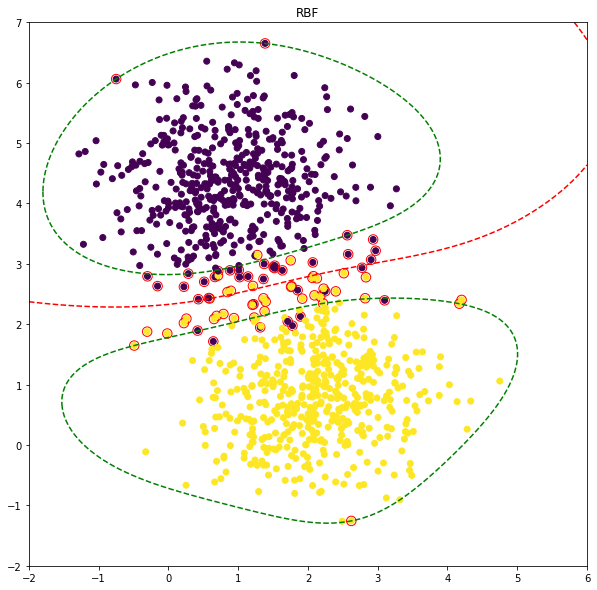

In [11]:
svm = SVC(kernel='rbf')
svm.fit(X, y)
plt.figure(figsize=(10, 10))

XX, YY = np.mgrid[-2:6:200j, -2:7:200j]
Z = svm.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)
plt.contour(XX, YY, Z, colors=['g', 'r', 'g'], linestyles=['--', '--', '--'],levels=[-1, 0, 1])

plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=90, facecolors='none', edgecolors='r')
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('RBF')
plt.show()

### Задание 2 (3 балла)

Примените метод SVM на датасетах cancer и spam, разбитый предварительно на train (80%) и validate (20%). 

Сравните время работы SVM и Random Forest при близкой точности.

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier as RF

In [20]:
def plot_roc_curve(y_test, y_prob):
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([-0.01, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.show()

In [21]:
CANCER_DATA_PATH = "hw7_data/cancer.csv"
SPAM_DATA_PATH = "hw7_data/spam.csv"
def read_cancer_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    df = pd.read_csv(path_to_csv, header=0)
    y = [1 if i == 'M' else 0 for i in df["label"]]
    return df.drop("label", axis=1).to_numpy(), np.array(y)

def read_spam_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    df = pd.read_csv(path_to_csv, header=0)
    y = df["label"]
    return df.drop("label", axis=1).to_numpy(), np.array(y.values)

X_cancer, y_cancer = read_cancer_dataset(CANCER_DATA_PATH)
X_spam, y_spam = read_spam_dataset(SPAM_DATA_PATH)

===== SVM cancer =====
13.6 ms ± 217 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
AUC=0.9808547008547008; accuracy=0.9473684210526315


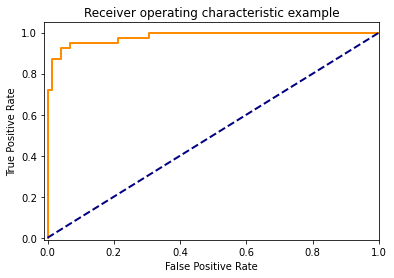

===== RF cancer =====
144 ms ± 2.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
AUC=0.996923076923077; accuracy=0.9736842105263158


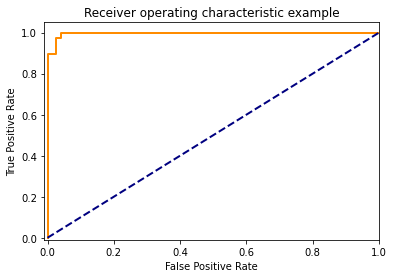

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, train_size = 0.8)
print("===== SVM cancer =====")
svm = SVC(probability=True)
%timeit svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_prob = svm.predict_proba(X_test)

print(f'AUC={roc_auc_score(y_test, y_prob[:, 1])}; accuracy={accuracy_score(y_test, y_pred)}')
plot_roc_curve(y_test, y_prob[:, 1])

print("===== RF cancer =====")
rf = RF()
%timeit rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)

print(f'AUC={roc_auc_score(y_test, y_prob[:, 1])}; accuracy={accuracy_score(y_test, y_pred)}')
plot_roc_curve(y_test, y_prob[:, 1])

===== SVM spam =====
3.25 s ± 115 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
AUC=0.8105563648095104; accuracy=0.7166123778501629


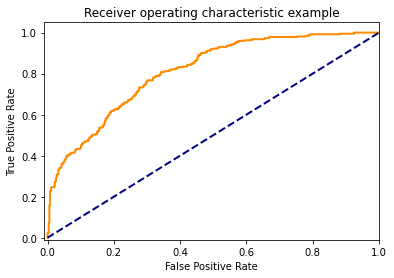

===== RF spam=====
478 ms ± 13.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
AUC=0.982366139076538; accuracy=0.9435396308360477


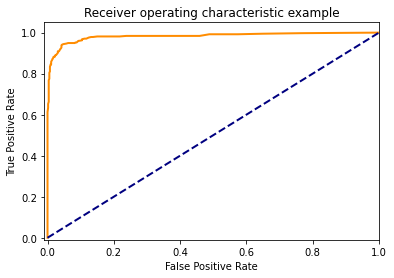

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_spam, y_spam, train_size = 0.8)
print("===== SVM spam =====")
svm = SVC(probability=True)
%timeit svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_prob = svm.predict_proba(X_test)

print(f'AUC={roc_auc_score(y_test, y_prob[:, 1])}; accuracy={accuracy_score(y_test, y_pred)}')
plot_roc_curve(y_test, y_prob[:, 1])

print("===== RF spam=====")
rf = RF()
%timeit rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)

print(f'AUC={roc_auc_score(y_test, y_prob[:, 1])}; accuracy={accuracy_score(y_test, y_pred)}')
plot_roc_curve(y_test, y_prob[:, 1])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_spam, y_spam, train_size = 0.8)
print("===== SVM spam =====")
svm = SVC()
%timeit svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print(f'accuracy={accuracy_score(y_test, y_pred)}')

print("===== RF spam=====")
rf = RF()
%timeit rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(f'accuracy={accuracy_score(y_test, y_pred)}')

===== SVM spam =====
601 ms ± 9.72 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
accuracy=0.7274701411509229
===== RF spam=====
467 ms ± 13.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
accuracy=0.9348534201954397


На раке качество у обоих хорошее, SVM быстрее.
На спаме у SVM качество заметно ниже, работает дольше.